# Data Loading

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

def parse_date(date_string):
    return datetime.strptime(date_string, '%b-%y')
# Read the CSV files
future_df = pd.read_csv('/content/Future_CRUDE_2005_2023.csv')

# Data Preprocessing

In [2]:
# Process Future_CRUDE_2005_2023.csv
future_df['Date'] = pd.to_datetime(future_df['Date'])
future_df['Expiry Date'] = pd.to_datetime(future_df['Expiry Date'])
future_df = future_df.sort_values(by=['Date','Expiry Date'])

In [3]:
future_df = future_df.drop_duplicates(subset='Date', keep='first').reset_index(drop=True)
future_df = future_df[['Date', 'Expiry Date', 'Close']]
future_df.dropna(inplace=True)
future_df = future_df.reset_index(drop=True)
future_df

,Date,Expiry Date,Close
0,2005-05-16,2005-06-15,2176
1,2005-05-17,2005-06-15,2192
2,2005-05-18,2005-06-15,2176
3,2005-05-19,2005-06-15,2150
4,2005-05-20,2005-06-15,2116
...,...,...,...
5165,2023-10-13,2023-10-19,7259
5166,2023-10-16,2023-10-19,7239
5167,2023-10-17,2023-10-19,7192
5168,2023-10-18,2023-10-19,7365


In [4]:
future_df['Log Return'] = np.log(future_df.groupby('Expiry Date')['Close'].shift(-1) / future_df['Close'])
future_df.dropna(subset=['Log Return'], inplace=True)
future_df.reset_index(drop=True, inplace=True)
future_df_2 = future_df[-307:]

In [5]:
import pandas as pd

# Example dataset (replace this with your actual dataset)
data = future_df_2
df = pd.DataFrame(data)

# Sort the DataFrame by 'Expiry Date' to ensure proper indexing
df = df.sort_values(by='Expiry Date').reset_index(drop=True)

# Generate test_indices
test_indices = []
start_index = 0

for date, group in df.groupby('Expiry Date'):
    end_index = start_index + len(group)  # Calculate end index
    test_indices.append([start_index - len(df), end_index - len(df)])  # Adjust for negative indices
    start_index = end_index

# Print test_indices
print("test_indices =", test_indices)

test_indices = [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


In [6]:
future_df_2.reset_index(drop=True, inplace=True)

In [7]:
future_df_2.head()

,Date,Expiry Date,Close,Log Return
0,2022-07-20,2022-08-19,8009,-0.029267
1,2022-07-21,2022-08-19,7778,-0.015287
2,2022-07-22,2022-08-19,7660,0.006895
3,2022-07-25,2022-08-19,7713,-0.006243
4,2022-07-26,2022-08-19,7665,0.020404


In [8]:
future_df_2.tail()

,Date,Expiry Date,Close,Log Return
302,2023-10-12,2023-10-19,6896,0.051301
303,2023-10-13,2023-10-19,7259,-0.002759
304,2023-10-16,2023-10-19,7239,-0.006514
305,2023-10-17,2023-10-19,7192,0.023770
306,2023-10-18,2023-10-19,7365,0.010401


In [9]:
future_df_2.describe()

,Date,Expiry Date,Close,Log Return
count,307,307,307.000000,307.000000
mean,2023-03-03 22:35:34.201954304,2023-03-19 04:36:44.560260608,6620.996743,-0.000384
min,2022-07-20 00:00:00,2022-08-19 00:00:00,5529.000000,-0.072605
25%,2022-11-09 12:00:00,2022-11-18 00:00:00,6175.500000,-0.013546
50%,2023-03-03 00:00:00,2023-03-20 00:00:00,6562.000000,0.002094
75%,2023-06-26 12:00:00,2023-07-19 00:00:00,7064.000000,0.013845
max,2023-10-18 00:00:00,2023-10-19 00:00:00,8009.000000,0.064498
std,NaN,NaN,565.086890,0.021911


In [10]:
import pandas as pd

# Generate descriptive statistics for relevant columns
stats = future_df_2[['Close', 'Log Return']].describe()

# Select only the statistics you want to display
selected_stats = stats.loc[['mean', 'std', 'min', 'max'], ['Close', 'Log Return']]

# Rename the index for clarity
selected_stats.index = ['Average Value', 'Standard Deviation', 'Minimum Value', 'Maximum Value']
selected_stats
# Export to LaTeX
print(selected_stats.to_latex(index=True, caption="Descriptive Statistics of the Dataset", label="tab:descriptive_statistics"))


\begin{table}
\caption{Descriptive Statistics of the Dataset}
\label{tab:descriptive_statistics}
\begin{tabular}{lrr}
\toprule
 & Close & Log Return \\
\midrule
Average Value & 6620.996743 & -0.000384 \\
Standard Deviation & 565.086890 & 0.021911 \\
Minimum Value & 5529.000000 & -0.072605 \\
Maximum Value & 8009.000000 & 0.064498 \\
\bottomrule
\end{tabular}
\end{table}



# Data validation for Geometric Brownian Motion

# Log Returns Histogram

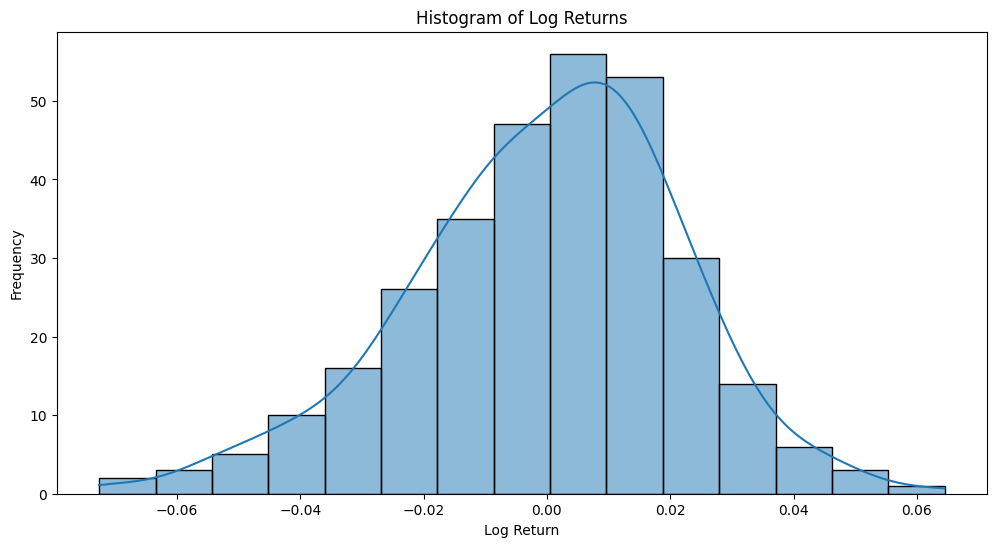

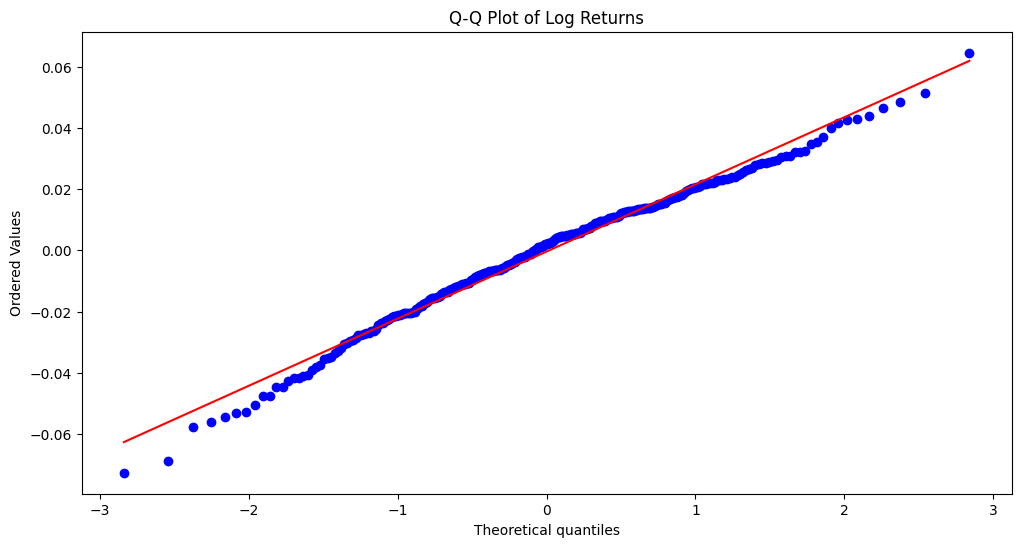

In [12]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram of Log Returns
plt.figure(figsize=(12, 6))
sns.histplot(future_df_2['Log Return'].dropna(), kde=True, bins=15)
plt.title('Histogram of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(future_df_2['Log Return'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Log Returns')
plt.show()


# ACF-PACF Plots

ADF Test Statistic: -16.856836489921175
p-value: 1.1075647657147045e-29


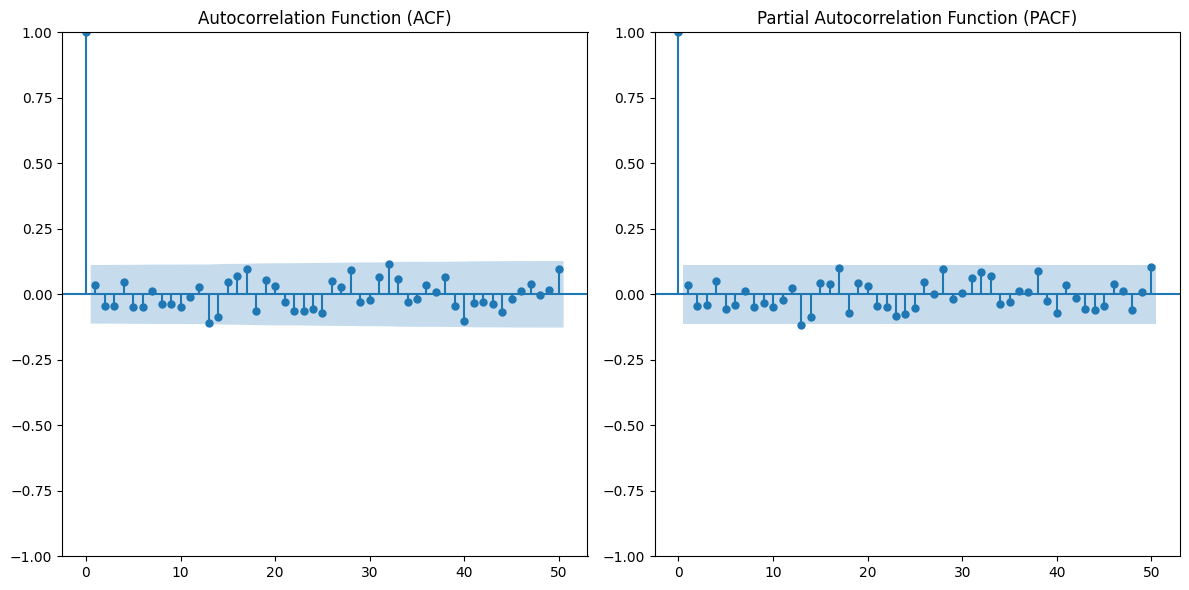

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(future_df_2['Log Return'].dropna())
print(f"ADF Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(future_df_2['Log Return'].dropna(), lags=50, ax=plt.gca(), alpha=0.05)
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(future_df_2['Log Return'].dropna(), lags=50, method='ywm', ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


# Ljung-Box test

In [ ]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming future_df is your DataFrame
# Ensure the 'Log Return' column exists
if 'Log Return' in future_df.columns:
    log_return_data = future_df_2['Log Return'].dropna()  # Drop NaNs if any

    # Ljung-Box Test
    # The lags parameter defines the number of lags to test for autocorrelation
    ljung_box_results = acorr_ljungbox(log_return_data, lags=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], return_df=True)

    print("Ljung-Box Test Results for Log Return:")
    print(ljung_box_results)
else:
    print("The 'Log Return' column does not exist in the dataset.")


Ljung-Box Test Results for Log Return:
      lb_stat  lb_pvalue
1    0.405545   0.524239
2    1.005896   0.604745
3    1.605441   0.658157
4    2.325646   0.676104
5    3.082376   0.687287
6    3.769911   0.707780
7    3.806741   0.801749
8    4.202445   0.838412
9    4.680768   0.861202
10   5.424191   0.861103
11   5.460423   0.906838
12   5.689243   0.930930
13   9.529736   0.731863
14  12.049672   0.602314
15  12.813541   0.616697
16  14.380784   0.570369
17  17.426036   0.425882
18  18.803819   0.403997
19  19.787752   0.407450
20  20.136014   0.449451
21  20.424397   0.494540
22  21.849930   0.468876
23  23.192507   0.449577
24  24.264029   0.446585
25  26.035662   0.405698


# BDS Test (Brockwell-Davis-Sanderson test)

In [ ]:
import statsmodels.tsa.stattools as ts
print(ts.bds(future_df_2['Log Return'], max_dim=6))

(array([-0.97035017,  0.07407098,  0.51187711,  0.56440433,  1.09505713]), array([0.33187198, 0.94095391, 0.60873702, 0.57247899, 0.27349161]))


In [ ]:
!pip install arch

# Strategy 1

In [ ]:
from arch import arch_model
def strategy_1(future_df, num_runs=100):
  # Initialize lists to store performance metrics across multiple runs
  accuracy_list = []
  accumulated_return_list = []
  average_duration_list = []
  average_total_trades = []
  average_total_return = []
  average_total_principal = []

  for _ in range(num_runs):
      # Add debugging statements to check the input data
      print(f"Run {_ + 1}/{num_runs}")
      print(f"future_df shape: {future_df.shape}")
      print(f"test_indices: {test_indices}")
      # Initialize performance tracking variables for each run
      total_trades = 0
      successful_trades = 0
      accumulated_return = 0
      durations_list = []
      total_return = 0
      total_principal = 0
      max_positions=2
      profit_target = 0.03
      stop_loss = -0.02


      # Calculate EMA of Log Returns for drift estimation (span 25)
      future_df['EMA Drift'] = future_df['Log Return'].ewm(span=25, adjust=True).mean()

      for test in test_indices:
          forecast_horizon = test[1] - test[0]
          actual_prices = future_df['Close'][test[0]:test[1]].values if test[1] != 0 else future_df['Close'][test[0]:].values
          garch_model = arch_model(future_df['Log Return'][:test[0]], vol='Garch', p=1, q=1, o=1)

          garch_results = garch_model.fit(disp="off")
          garch_forecast = garch_results.forecast(horizon=forecast_horizon)
          volatility_forecast = garch_forecast.variance.values[-1, :] ** 0.5

          # Step 3: Strategy simulation across forecast horizon
          last_price = future_df['Close'].iloc[test[0]]
          open_positions = []

          for t in range(forecast_horizon):
              # Calculate days left to expiry and dynamic simulation horizon
              days_left_to_expiry = forecast_horizon - t
              simulation_days = max(1, days_left_to_expiry)

              # Get the latest EMA Drift and volatility for the current step
              current_drift = future_df['EMA Drift'].iloc[test[0] + t]
              current_volatility = volatility_forecast[t]

              # Simulate future price paths
              num_simulations = 10000
              simulated_prices = np.zeros((simulation_days, num_simulations))
              simulated_prices[0] = actual_prices[t]

              for sim_t in range(1, simulation_days):
                  Z = np.random.standard_normal(num_simulations)
                  drift = current_drift - 0.5 * current_volatility**2
                  simulated_prices[sim_t] = simulated_prices[sim_t-1] * np.exp(drift + current_volatility * Z)

              # Calculate probabilities for price movements
              target_price_up = actual_prices[t] * 1.02
              target_price_down = actual_prices[t] * 0.98
              above_prob = (simulated_prices[-1] >= target_price_up).mean()
              below_prob = (simulated_prices[-1] <= target_price_down).mean()


              # Generate buy/sell signals based on probability thresholds
              if len(open_positions) < max_positions:
                  if above_prob > 0.5:
                      open_positions.append((actual_prices[t], 1, t))
                  elif below_prob > 0.5:
                      open_positions.append((actual_prices[t], -1, t))

              # Check for exit criteria for open positions
              closed_positions = []
              for position in open_positions:
                  entry_price, position_type, entry_time = position
                  trade_return = ((actual_prices[t] - entry_price) / entry_price if position_type == 1
                                  else (entry_price - actual_prices[t]) / entry_price)


                  # Exit if conditions for profit target, stop loss, or horizon expiry are met
                  if ((position_type == 1 and (trade_return >= profit_target or trade_return <= stop_loss)) or
                      (position_type == -1 and (trade_return >= profit_target or trade_return <= stop_loss))):
                      total_trades += 1
                      accumulated_return += trade_return
                      total_return += ((actual_prices[t] - entry_price)  if position_type == 1
                                  else (entry_price - actual_prices[t]) )
                      average_total_principal.append(entry_price)
                      durations_list.append(t - entry_time)
                      if trade_return > 0:
                          successful_trades += 1
                      closed_positions.append(position)

              # Remove closed positions from the open positions list
              open_positions = [p for p in open_positions if p not in closed_positions]

          # Close remaining open positions at the end of the horizon
          final_price = actual_prices[-1]
          for position in open_positions:
              entry_price, position_type, entry_time = position
              trade_return = ((final_price - entry_price) / entry_price if position_type == 1
                              else (entry_price - final_price) / entry_price)
              total_trades += 1
              accumulated_return += trade_return
              total_return += ((actual_prices[t] - entry_price)  if position_type == 1
                                  else (entry_price - actual_prices[t]) )
              average_total_principal.append(entry_price)
              durations_list.append(forecast_horizon - entry_time)
              if trade_return > 0:
                  successful_trades += 1

      # Record performance metrics for each run
      accuracy = successful_trades / total_trades if total_trades > 0 else 0
      average_duration = np.mean(durations_list) if durations_list else 0
      accuracy_list.append(accuracy)
      accumulated_return_list.append(accumulated_return)
      average_duration_list.append(average_duration)
      average_total_trades.append(total_trades)
      average_total_return.append(total_return)


  return np.mean(accuracy_list), np.mean(accumulated_return_list), np.mean(average_total_trades),np.mean(average_duration_list),np.mean(average_total_return),np.mean(average_total_principal),np.mean(average_total_return)/(np.mean(average_total_principal)*max_positions*0.3)

# Strategy_1 Results

In [ ]:
accuracy, accumulated_return, total_trades, avg_duration, tot_ret, avg_principal, avg_return = strategy_1(future_df)
print(f"Accuracy =  {accuracy:.2%}")
print(f"Average Accumulated Return: {accumulated_return:.2%}")
print("Total Trades = ",total_trades)
print("Average Duration = ",avg_duration)
print("Average Total Return = ",tot_ret)
print("Average Total Principal = ",avg_principal)
print(f"Average Return =  {avg_return:.2%}")

Run 1/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 2/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 3/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 4/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 5/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 6/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 7/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 8/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 9/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 10/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 11/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 12/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 13/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 14/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 15/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 16/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 17/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 18/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 19/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 20/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 21/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 22/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 23/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 24/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 25/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 26/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 27/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 28/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 29/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 30/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 31/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 32/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 33/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 34/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 35/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 36/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 37/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 38/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 39/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 40/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 41/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 42/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 43/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 44/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 45/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 46/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 47/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 48/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 49/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 50/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 51/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 52/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 53/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 54/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 55/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 56/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 57/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 58/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 59/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 60/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 61/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 62/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 63/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 64/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 65/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 66/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 67/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 68/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 69/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 70/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 71/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 72/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 73/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 74/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 75/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 76/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 77/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 78/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 79/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 80/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 81/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 82/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 83/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 84/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 85/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 86/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 87/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 88/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 89/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 90/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 91/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 92/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 93/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 94/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 95/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 96/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 97/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 98/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 99/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Run 100/100
future_df shape: (4949, 5)
test_indices: [[-307, -286], [-286, -266], [-266, -245], [-245, -224], [-224, -204], [-204, -182], [-182, -163], [-163, -143], [-143, -123], [-123, -102], [-102, -83], [-83, -61], [-61, -40], [-40, -20], [-20, 0]]


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y

Accuracy =  60.23%
Average Accumulated Return: 143.04%
Total Trades =  102.7
Average Duration =  2.881004720060229
Average Total Return =  10084.7
Average Total Principal =  6626.882083739046
Average Return =  253.63%


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# Strategy 2

In [ ]:
from arch import arch_model
def strategy_2(future_df, num_runs=100):
  # Initialize lists to store performance metrics across multiple runs
  accuracy_list = []
  accumulated_return_list = []
  average_duration_list = []
  average_total_trades = []
  average_total_return = []
  average_total_principal = []
  num_runs = 100


  for _ in range(num_runs):
      # Initialize performance tracking variables for each run
      total_trades = 0
      successful_trades = 0
      accumulated_return = 0
      durations_list = []
      total_return = 0
      total_principal = 0
      max_positions=2
      profit_target = 0.03
      stop_loss = -0.02
      initial_threshold_prob = 0.60
      initial_decline_threshold = 0.06
      decay_rate = 0.00

      # Calculate EMA of Log Returns for drift estimation (span 25)
      future_df['EMA Drift'] = future_df['Log Return'].ewm(span=25, adjust=True).mean()

      for test in test_indices:
          forecast_horizon = test[1] - test[0]
          actual_prices = future_df['Close'][test[0]:test[1]].values if test[1] != 0 else future_df['Close'][test[0]:].values
          garch_model = arch_model(future_df['Log Return'][:test[0]], vol='Garch', p=1, q=1, o=1)  # GJR-GARCH(1,1)

          garch_results = garch_model.fit(disp="off")
          garch_forecast = garch_results.forecast(horizon=forecast_horizon)
          volatility_forecast = garch_forecast.variance.values[-1, :] ** 0.5

          # Retrieve the EMA drift specific to the current point
          ema_drift = future_df['EMA Drift'].iloc[test[0]]

          # Step 3: Simulate future price paths with GARCH volatility and EMA drift
          num_simulations = 1000
          last_price = future_df['Close'].iloc[test[0]]
          simulated_prices = np.zeros((forecast_horizon, num_simulations))
          simulated_prices[0] = last_price

          for t in range(1, forecast_horizon):
              Z = np.random.standard_normal(num_simulations)
              drift = ema_drift - 0.5 * volatility_forecast[t]**2
              simulated_prices[t] = simulated_prices[t-1] * np.exp(drift + volatility_forecast[t] * Z)

          # Initialize lists to store probabilities and positions
          above_actual = []
          below_actual = []
          open_positions = []

          for t in range(forecast_horizon):
              decayed_threshold_prob = initial_threshold_prob
              decayed_decline_threshold = initial_decline_threshold
              above_prob = (simulated_prices[t] > actual_prices[t]).mean()
              below_prob = (simulated_prices[t] < actual_prices[t]).mean()
              above_actual.append(above_prob)
              below_actual.append(below_prob)

              # Generate buy/sell signals if below max positions
              if len(open_positions) < max_positions:
                  if above_prob > decayed_threshold_prob:
                      open_positions.append((actual_prices[t], 1, above_prob, t))  # Include entry time `t`
                  elif below_prob > decayed_threshold_prob:
                      open_positions.append((actual_prices[t], -1, below_prob, t))  # Include entry time `t`

              # Exit criteria check
              closed_positions = []
              for position in open_positions:
                  entry_price, position_type, entry_prob, entry_time = position
                  exit_price = actual_prices[t]
                  trade_return = (exit_price - entry_price) / entry_price if position_type == 1 else (entry_price - exit_price) / entry_price

                  if position_type == 1:
                      if trade_return >= profit_target or trade_return <= stop_loss or (entry_prob - above_prob)  >= decayed_decline_threshold:
                          total_trades += 1
                          accumulated_return += trade_return
                          total_return += ((actual_prices[t] - entry_price)  if position_type == 1
                                  else (entry_price - actual_prices[t]) )
                          average_total_principal.append(entry_price)
                          durations_list.append(t - entry_time)  # Track the duration of the trade
                          if trade_return > 0:
                              successful_trades += 1
                          closed_positions.append(position)
                  elif position_type == -1:
                      if trade_return >= profit_target or trade_return <= stop_loss or (entry_prob - below_prob)  >= decayed_decline_threshold:
                          total_trades += 1
                          accumulated_return += trade_return
                          total_return += ((actual_prices[t] - entry_price)  if position_type == 1
                                  else (entry_price - actual_prices[t]) )
                          average_total_principal.append(entry_price)
                          durations_list.append(t - entry_time)  # Track the duration of the trade
                          if trade_return > 0:
                              successful_trades += 1
                          closed_positions.append(position)

              open_positions = [p for p in open_positions if p not in closed_positions]

          final_price = actual_prices[-1]
          for position in open_positions:
              entry_price, position_type, _, entry_time = position
              trade_return = (final_price - entry_price) / entry_price if position_type == 1 else (entry_price - final_price) / entry_price
              total_trades += 1
              accumulated_return += trade_return
              total_return += ((actual_prices[t] - entry_price)  if position_type == 1
                                  else (entry_price - actual_prices[t]) )
              average_total_principal.append(entry_price)
              durations_list.append(forecast_horizon - entry_time)  # Track duration for unclosed positions
              if trade_return > 0:
                  successful_trades += 1

      # Calculate performance for this run
      accuracy = successful_trades / total_trades if total_trades > 0 else 0
      average_duration = np.mean(durations_list) if durations_list else 0  # Calculate average duration if any trade occurred
      accuracy_list.append(accuracy)
      accumulated_return_list.append(accumulated_return)
      average_duration_list.append(average_duration)
      average_total_trades.append(total_trades)
      average_total_return.append(total_return)


  # Calculate and print average metrics across runs
  average_accuracy = np.mean(accuracy_list)
  average_accumulated_return = np.mean(accumulated_return_list)
  average_trade_duration = np.mean(average_duration_list)
  average_total_trades = np.mean(average_total_trades)
  average_total_return = np.mean(average_total_return)
  average_total_principal = np.mean(average_total_principal)

  return average_accuracy, np.mean(accumulated_return_list), np.mean(average_total_trades),average_trade_duration,average_total_return,average_total_principal,(average_total_return)/(average_total_principal*max_positions*0.3)


# Strategy_2 Results

In [ ]:
accuracy, accumulated_return, total_trades, avg_duration, tot_ret, avg_principal, avg_return = strategy_2(future_df)
print(f"Accuracy =  {accuracy:.2%}")
print(f"Average Accumulated Return: {accumulated_return:.2%}")
print("Total Trades = ",total_trades)
print("Average Duration = ",avg_duration)
print("Average Total Return = ",tot_ret)
print("Average Total Principal = ",avg_principal)
print(f"Average Return =  {avg_return:.2%}")

Streaming output truncated to the last 5000 lines.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0113. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by eithe

Accuracy =  57.41%
Average Accumulated Return: 24.69%
Total Trades =  48.01
Average Duration =  2.020289992232483
Average Total Return =  1693.87
Average Total Principal =  6866.3099354301185
Average Return =  41.12%


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0113. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
